In [1]:
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('final_df_3.csv')

In [5]:
df.head()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
X=df.drop('pIC50',axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4690,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4691,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4692,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4693,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
y=df['pIC50']

In [11]:
y

0       6.124939
1       7.000000
2       4.301030
3       6.522879
4       6.096910
          ...   
4690    5.612610
4691    5.595166
4692    5.419075
4693    5.460924
4694    5.555955
Name: pIC50, Length: 4695, dtype: float64

In [13]:
X.shape

(4695, 881)

In [14]:
y.shape

(4695,)

In [15]:
from sklearn.feature_selection import VarianceThreshold

In [19]:
selection=VarianceThreshold(threshold=(.8*(1-.8)))
X=selection.fit_transform(X)

In [20]:
X.shape

(4695, 137)

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
X_train.shape,y_train.shape

((3756, 137), (3756,))

In [67]:
np.random.seed(100)
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)
score=model.score(X_test,y_test)
score


0.5025402171548303

In [68]:
Y_pred=model.predict(X_test)

In [69]:
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

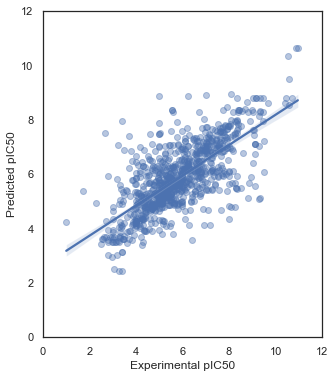

In [70]:
sns.set(color_codes=True)
sns.set_style("white")
ax=sns.regplot(y_test,Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50')
ax.set_ylabel('Predicted pIC50')
ax.set_xlim(0,12)
ax.set_ylim(0,12)
ax.figure.set_size_inches(5,6)
plt.show

In [36]:
from sklearn.metrics import accuracy_score,mean_squared_error

In [38]:
ac=mean_squared_error(y_test,Y_pred)
print(f"Mean Squared Error: {ac:.2f}")

Mean Squared Error: 1.21


In [42]:
feature_list = list(df.columns)

In [45]:
error=Y_pred-y_test
print('Average absolute error:', round(np.mean(error), 2), 'degrees.')

Average absolute error: 0.05 degrees.


In [48]:
mape = np.mean(100 * (error / y_test))
mape

4.649741114639415

In [49]:
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 95.35 %.


In [52]:
###Feature Reduction
importance=list(model.feature_importances_)
feature_importances=[(df,round(importance,2)) for df,importance in zip(feature_list,importance)]
feature_importances=sorted(feature_importances,key=lambda x: x[1], reverse = True)
#[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]
feature_importances

[('PubchemFP67', 0.05),
 ('PubchemFP0', 0.04),
 ('PubchemFP13', 0.03),
 ('PubchemFP131', 0.03),
 ('PubchemFP4', 0.02),
 ('PubchemFP17', 0.02),
 ('PubchemFP19', 0.02),
 ('PubchemFP26', 0.02),
 ('PubchemFP36', 0.02),
 ('PubchemFP37', 0.02),
 ('PubchemFP60', 0.02),
 ('PubchemFP87', 0.02),
 ('PubchemFP91', 0.02),
 ('PubchemFP94', 0.02),
 ('PubchemFP112', 0.02),
 ('PubchemFP114', 0.02),
 ('PubchemFP121', 0.02),
 ('PubchemFP136', 0.02),
 ('PubchemFP1', 0.01),
 ('PubchemFP2', 0.01),
 ('PubchemFP3', 0.01),
 ('PubchemFP5', 0.01),
 ('PubchemFP6', 0.01),
 ('PubchemFP7', 0.01),
 ('PubchemFP8', 0.01),
 ('PubchemFP9', 0.01),
 ('PubchemFP10', 0.01),
 ('PubchemFP11', 0.01),
 ('PubchemFP12', 0.01),
 ('PubchemFP14', 0.01),
 ('PubchemFP15', 0.01),
 ('PubchemFP16', 0.01),
 ('PubchemFP20', 0.01),
 ('PubchemFP21', 0.01),
 ('PubchemFP22', 0.01),
 ('PubchemFP25', 0.01),
 ('PubchemFP27', 0.01),
 ('PubchemFP29', 0.01),
 ('PubchemFP30', 0.01),
 ('PubchemFP33', 0.01),
 ('PubchemFP41', 0.01),
 ('PubchemFP43', 0.01